LEVEL 2 (INTERMEDIATE)

TASK 2 CLASSIFICATION PROBLEM

In [89]:
import pandas as pd
iris_df = pd.read_csv("C:/Users/Samuel Raj/Downloads/Codveda/1) iris.csv")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


MISSING VALUES CHECK

In [90]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

NUMBER OF UNIQUE VALUES

In [91]:
iris_df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

DUPLICATE VALUE CHECK

In [92]:
print("No Duplicates Found!" if iris_df.shape[0] == iris_df.drop_duplicates().shape[0]  else iris_df.drop_duplicates()) 

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[147 rows x 5 columns]


OUTLIER DETECTION

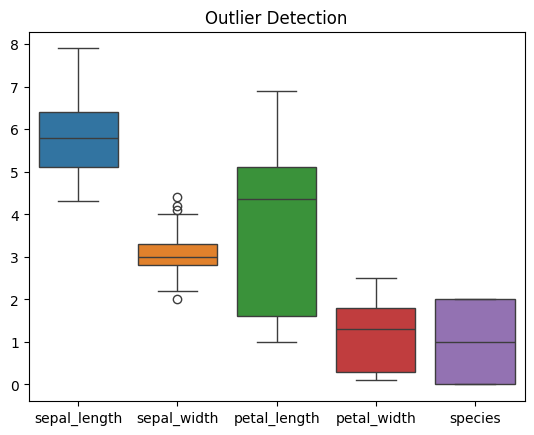

In [148]:
from matplotlib import pyplot as plt
import seaborn as sns
numerical = iris_df.select_dtypes(include='number')
sns.boxplot(data=numerical)
plt.title("Outlier Detection")
plt.show();

LABEL ENCODING CATEGORICAL COLUMNS

0 → setosa

1 → versicolor

2 → virginica

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_df['species'] = le.fit_transform(iris_df['species'])
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


STANDARD SCALING NUMERICAL COLUMNS

In [95]:
from sklearn.preprocessing import StandardScaler
X, y = iris_df.drop("species", axis=1), iris_df["species"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X BEFORE AND AFTER SCALING

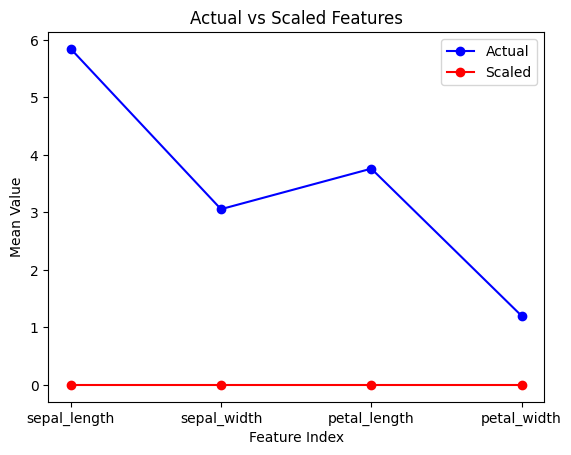

In [96]:
import numpy as np
plt.plot(np.mean(X, axis=0), label='Actual', marker='o', color='blue')
plt.plot(np.mean(X_scaled, axis=0), label='Scaled', marker='o', color='red')
plt.legend(); plt.xlabel('Feature Index'); plt.ylabel('Mean Value')
plt.title('Actual vs Scaled Features')
plt.show();

TRAIN TEST SPLIT

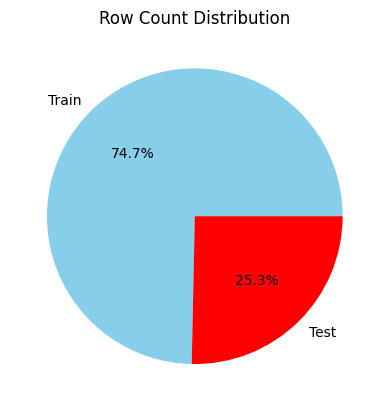

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, shuffle=True)
plt.pie([X_train.shape[0],X_test.shape[0]], labels=['Train', 'Test'], colors=['skyblue', 'red'], autopct='%1.1f%%')
plt.title('Row Count Distribution')
plt.show()

LOGISTIC REGRESSION

In [98]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(); log.fit(X_train, y_train)
log_preds = log.predict(X_test)
pd.DataFrame({"Actual": y_test,"Predicted": log_preds})

,Actual,Predicted
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


RANDOM FOREST

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(); rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
pd.DataFrame({"Actual": y_test,"Predicted": rf_preds})

,Actual,Predicted
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


SUPPORT VECTOR MACHINE

In [100]:
from sklearn.svm import SVC
svm = SVC(); svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
pd.DataFrame({"Actual": y_test,"Predicted": svm_preds})

,Actual,Predicted
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


ACTUAL VS PREDICTED

In [ ]:
Act_vs_pred = pd.DataFrame({"Actual Y": y_test,"Logistic Regression": log_preds,"Random Forest": rf_preds,"Support Vector": svm_preds })
Act_vs_pred.sample(5)

,Actual Y,Logistic Regression,Random Forest,Support Vector
12,0,0,0,0
76,1,1,1,1
29,0,0,0,0
143,2,2,2,2
64,1,1,1,1


MODEL EVALUATION

In [146]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
result = pd.DataFrame({'Accuracy': [int(accuracy_score(y_test, log_preds)*100),                         int(accuracy_score(y_test, rf_preds)*100),                          int(accuracy_score(y_test, svm_preds)*100)], 
                    'Precision': [round(precision_score(y_test, log_preds, average='weighted'), 3),     round(precision_score(y_test, rf_preds, average='weighted'), 3),    round(precision_score(y_test, svm_preds, average='weighted'), 3)], 
                    'Recall': [round(recall_score(y_test, log_preds, average='weighted'), 3),           round(recall_score(y_test, rf_preds, average='weighted'), 3),       round(recall_score(y_test, svm_preds, average='weighted'), 3)], 
                    'F1 Score': [round(f1_score(y_test, log_preds, average='weighted'), 3),             round(f1_score(y_test, rf_preds, average='weighted'), 3),           round(f1_score(y_test, svm_preds, average='weighted'), 3)]}
                    , index=['Logistic Regression', 'Random Forest', 'Support Vector Machine'])
result

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,100,1.0,1.0,1.0
Random Forest,100,1.0,1.0,1.0
Support Vector Machine,100,1.0,1.0,1.0


In [143]:
winner = result['Accuracy'].idxmax()
Accuracy = result.loc[winner, 'Accuracy']
print(f"Best Model: {winner} with {Accuracy}% Accuracy" if 95 > Accuracy > 70 else "No Model fitted perfectly! (either overfit or Underfit)")

No Model fitted perfectly! (either overfit or Underfit)


In [145]:
if Accuracy in range(75,99):
    print(f"Best Model: {winner} with {result.loc[winner, 'Accuracy']}% Accuracy")
elif Accuracy > 95:
    print("Every model Overfits!")
elif 75 > Accuracy > 1:
    print("Models possibly underfitted")

Every model Overfits!


This happens when model over-reads the dataset instead of understanding patterns